In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import re
from wordcloud import WordCloud

In [21]:
df=pd.read_csv("E:\\anushka\\Anushka_python\\flipkart_data.csv")

In [22]:
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [23]:
df.shape

(9976, 2)

In [24]:
pd.unique(df.rating)

array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

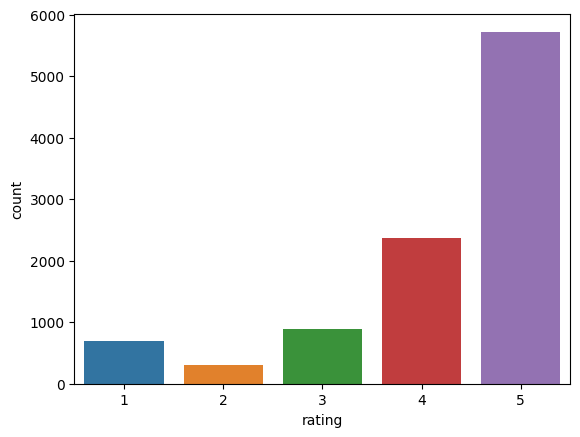

In [25]:
sns.countplot(data=df,x='rating')

In [26]:
a=[]
for i in df.rating:
    if i<=4:
        a.append(0)
    else:
        a.append(1)
df['label']=a

In [32]:
df

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1
...,...,...,...
9971,GoodREAD MORE,5,1
9972,Everything is amazimg but the built is very li...,5,1
9973,GoodREAD MORE,5,1
9974,Best headphone i have ever used....READ MORE,5,1


In [45]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
stop_words=set(stopwords.words('english'))
def remove(sentence):
    sentence=re.sub(r'[^\w\s]','',sentence)#punction mark
    sentence=sentence.lower()
    words=sentence.split()
    fil_words=[word for word in words if word not in stop_words]
    return ' '.join(fil_words)

In [56]:
df['review']=df['review'].apply(remove)

In [57]:
df

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1
...,...,...,...
9971,goodread,5,1
9972,everything amazimg built lightread,5,1
9973,goodread,5,1
9974,best headphone ever usedread,5,1


In [35]:
df['label'].value_counts()

label
1    5726
0    4250
Name: count, dtype: int64

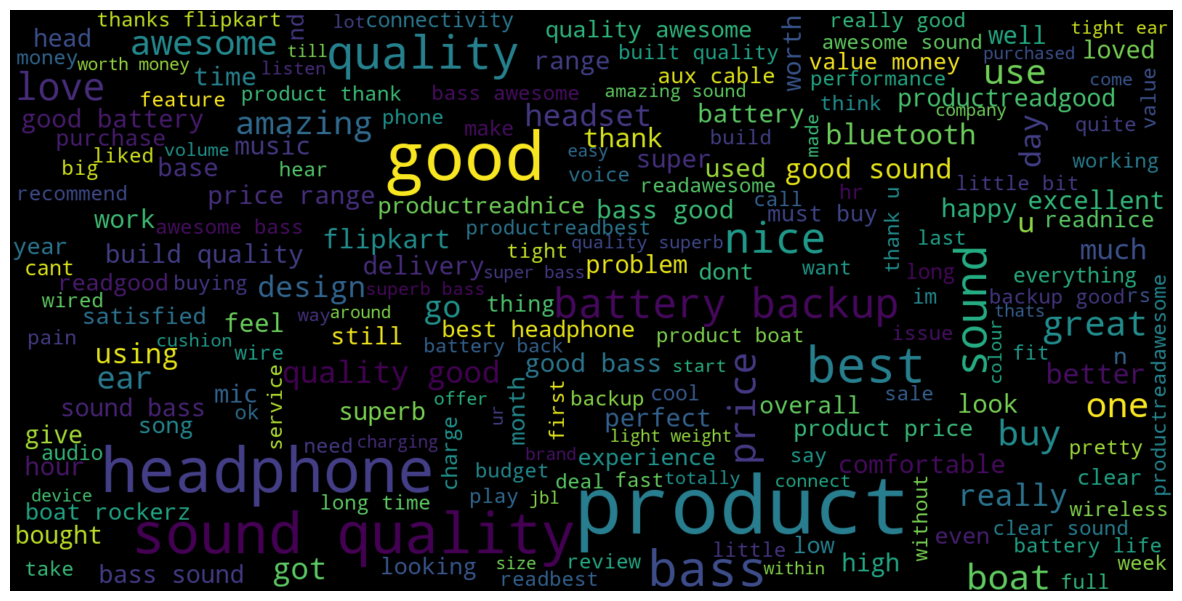

In [100]:
consolidated=''.join(
    word for word in df['review'][df['label']==1].astype(str))
wordcloud=WordCloud(width=1600,height=800,
                    random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
cv=CountVectorizer(stop_words='english',max_features=2500)

In [64]:
df_1=cv.fit_transform(df['review']).toarray()

In [65]:
df_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
col=cv.get_feature_names_out(df_1)

In [74]:
X=pd.DataFrame(df_1,columns=col)

In [75]:
y=df.label

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [95]:
len(X_train)

7980

In [96]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
from sklearn.metrics import accuracy_score

In [97]:
y_pred=model.predict(X_train)
print(accuracy_score(y_train,y_pred))

0.9162907268170426


[[2881  549]
 [ 116 4434]]


<Axes: >

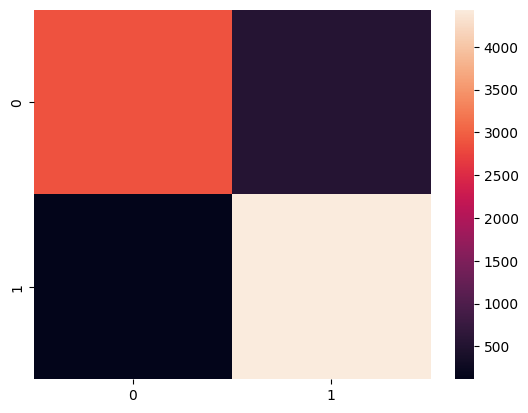

In [88]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred)
print(cm)
sns.heatmap(cm)